## Multiple Linear Regression and Regression Error Metrics

## Import library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,7)

c:\Users\serda\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Read Dataset

In [5]:
df = pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\ML\Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Distribution of features

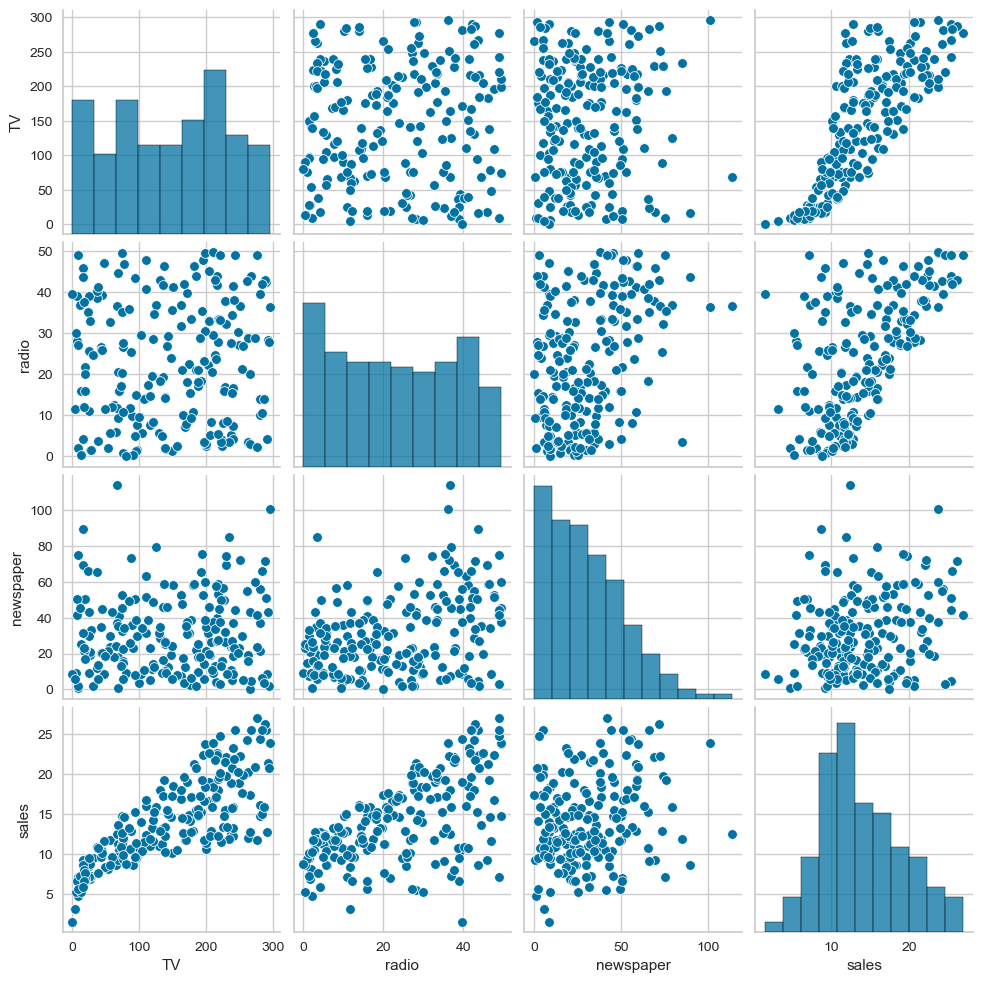

In [9]:
sns.pairplot(df)
plt.show();

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


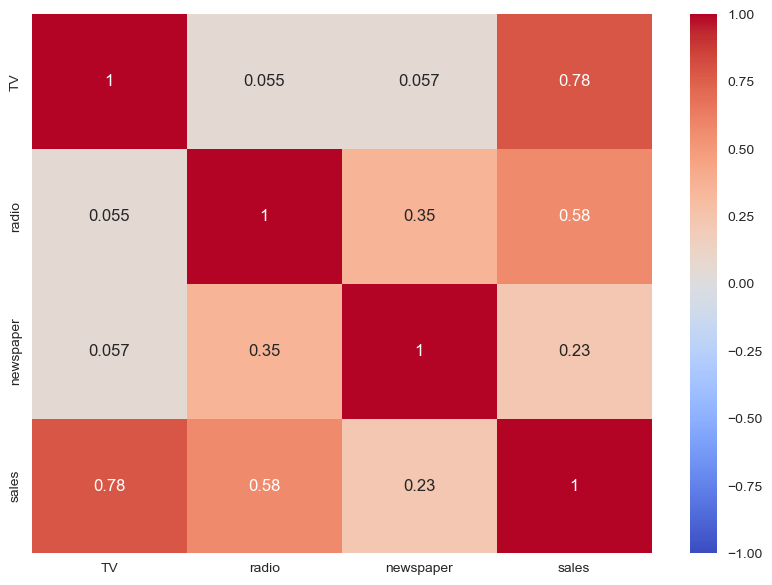

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();

## Train-Test Split

In [12]:
# If you're not using anaconda:
# pip install scikit-learn
# conda install scikit-learn

In [13]:
X = df.drop(columns="sales")  # df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [14]:
from sklearn.model_selection import train_test_split

# We will use this function to split the data into train/test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default test_size is 0.25. The idea here is to get as many data points in the train set as possible without hurting the
# testing of the model. The choice is somewhat arbitrary.

In [16]:
df.sample(15)

,TV,radio,newspaper,sales
170,50.0,11.6,18.4,8.4
8,8.6,2.1,1.0,4.8
185,205.0,45.1,19.6,22.6
153,171.3,39.7,37.7,19.0
94,107.4,14.0,10.9,11.5
144,96.2,14.8,38.9,11.4
179,165.6,10.0,17.6,12.6
132,8.4,27.2,2.1,5.7
152,197.6,23.3,14.2,16.6
71,109.8,14.3,31.7,12.4


In [17]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


In [18]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [19]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [20]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [21]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [22]:
from sklearn.linear_model import LinearRegression

# Import LinearRegression class from scikit-learn

In [23]:
model = LinearRegression()

# Instantiate the class

In [24]:
model.fit(X_train, y_train)

# our `model` is an object of the `LinearRegression` class. We can now access its methods.
# The `fit` method, in scikit-learn, is always used to learn some parameters about the data.

LinearRegression()

In [25]:
y_pred = model.predict(X_test) # Since the `model` object is now the trained linear regression model, we can invoke the `predict`
# method to get predictions on the test set.
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [26]:
X_train.head(1)

,TV,radio,newspaper
79,116.0,7.7,23.1


In [27]:
# y = b0 + b1X1 + b2X2 + b3X3       b0, b1, b2, b3  are coefficients = slope
model.coef_

# The coefficients listed in the `coef_` attribute is in the same order as with the features of our X_train.

array([0.04472952, 0.18919505, 0.00276111])

In [28]:
model.intercept_

2.979067338122629

In [29]:
X_test.loc[[95]]

,TV,radio,newspaper
95,163.3,31.6,52.9


In [30]:
y_test.loc[95]

16.9

In [31]:
model.predict(X_test.loc[[95]])
# ML algorithms accept 2-dimensional data, even if you have only one instance (observation point).

array([16.4080242])

In [32]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [33]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual,LSE,ABS
95,16.9,16.408024,0.491976,0.242040,0.491976
15,22.4,20.889882,1.510118,2.280456,1.510118
30,21.4,21.553843,-0.153843,0.023668,0.153843
158,7.3,10.608503,-3.308503,10.946189,3.308503
128,24.7,22.112373,2.587627,6.695812,2.587627
115,12.6,13.105592,-0.505592,0.255623,0.505592
69,22.3,21.057192,1.242808,1.544572,1.242808
170,8.4,7.461010,0.938990,0.881702,0.938990
174,11.5,13.606346,-2.106346,4.436693,2.106346
45,14.9,15.155070,-0.255070,0.065061,0.255070


In [34]:
result_sample = comparing.iloc[:, :3]
result_sample

# Selecting only the first 3 columns to visualise the model performance.

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


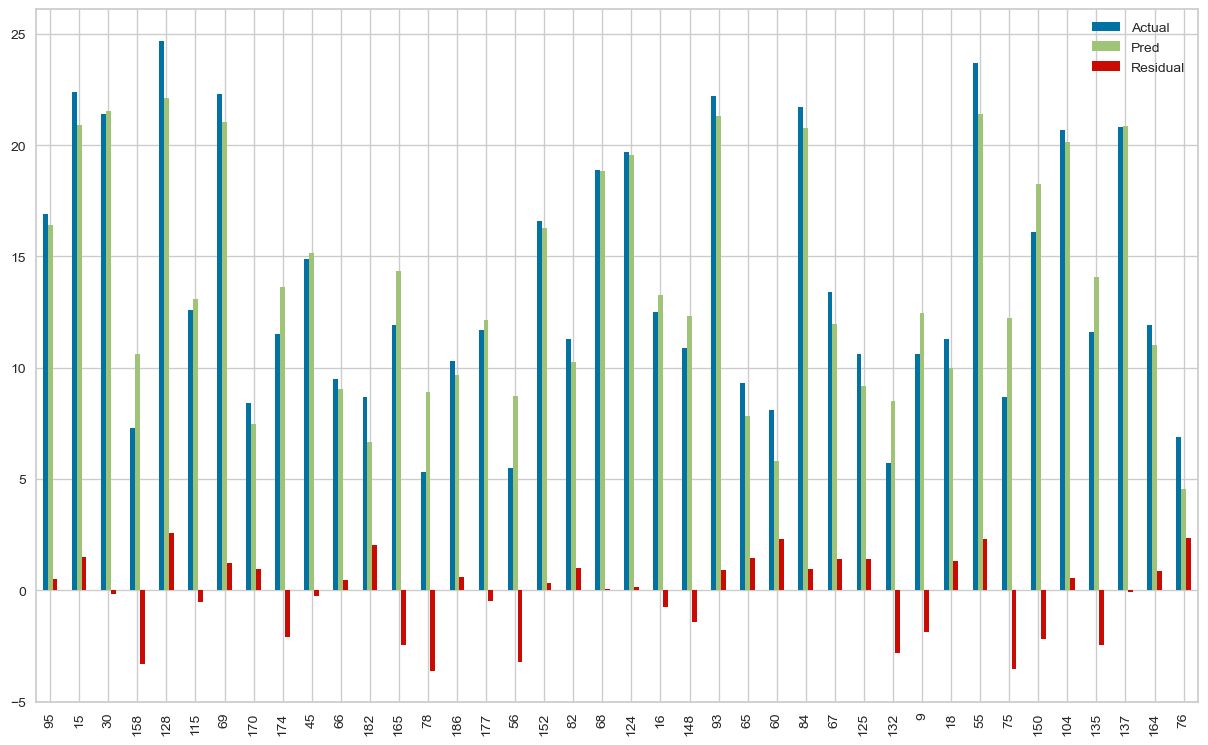

In [35]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show();

## Error Metrics

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [37]:
R2_score = r2_score(y_test, y_pred)
R2_score

# Statistically R2 is between [0, 1]
# In sklearn, [-np.inf, 1]

0.899438024100912

In [38]:
mae = mean_absolute_error(y_test, y_pred)  # comparing.ABS.sum()/X_test.shape[0]
mae

# Take the absolute values of residuals and sum them up. Divide the summation by the number of observation points.

1.4607567168117606

In [39]:
# comparing.ABS.sum()/X_test.shape[0]

In [41]:
mse = mean_squared_error(y_test, y_pred)  # comparing.LSE.sum()/X_test.shape[0]
mse

# Square the residuals individually and sum them up. Divide the summation by the number of observation points.
# Penalises large errors. Difficult to interpret as it changes the scale.

3.1740973539761046

In [42]:
# Comparing.LSE.sum()/X_test.shape[0]

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #(comparing.LSE.sum()/X_test.shape[0])**0.5
rmse

# Square the residuals individually and sum them up. Divide the summation by the number of observation points. And then square root the result.
# Penalises large errors. Easy to interpret as we bring back the scale of the values to normal level by square rooting it.

1.7815996615334502

In [44]:
rmse=mean_squared_error(y_test, y_pred,squared=False)
rmse

1.7815996615334502

In [45]:
# (comparing.LSE.sum()/X_test.shape[0])**0.5

In [46]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape
# The idea of this metric is to be sensitive to relative errors. It is for example not changed by a global scaling of the target variable.

0.15198846602831229

## Adjusted R2 score

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [47]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations (rows)
    p = X.shape[1] # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# Every added independent feature, in the worst-case scenario, will not change the r2 score for better or worse. 
# In the best-case scenario, it will improve the r2 score.
# This creates a disadvantage when interpreting the r2 score if we have too many independent features because we don’t account for the number of independent features
# it took us to get to a certain r2 score. The adjusted r2 score does exactly that.
# It accounts for the number of independent features it took us to achieve a certain r2 score,
# making it a more robust estimate of the true r2 score in situations where we have a lot of
# independent features. Scikit-learn does not have a built-in function to calculate
# the adjusted r2 score out of the box, so we implemented our own function to do that.

In [49]:
adj_r2(y_test, y_pred, X_test)

0.8910578594426547

## What is the concept of punishment for RMSE error metric?

In [50]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]} # 5300

# Let's demonstrate with an example how RMSE penalises large errors.

In [51]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [52]:
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [53]:
#mae
y_test_ex = df_2.Actual
y_pred_ex = df_2.pred

mean_absolute_error(y_test_ex, y_pred_ex)

200.0

In [54]:
#rmse

np.sqrt(mean_squared_error(y_test_ex, y_pred_ex))

# When we don't have large errors; that is, the actual and predicted values are relatively close to each other,
# RMSE and MAE scores will also be relatively close to each other due to the lack of large errors.

209.76176963403032

In [55]:
variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 6000]} # 5300

# We added a way more off prediction now to represent a large mistake.

In [56]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,6000


In [57]:
#mae

y_test_ex = df_3.Actual
y_pred_ex = df_3.pred

mean_absolute_error(y_test_ex, y_pred_ex)

340.0

In [58]:
#rmse

np.sqrt(mean_squared_error(y_test_ex, y_pred_ex))

# As you can see, when large errors are present, RMSE gets much larger than MAE. This is due to the fact that RMSE penalises
# large errors by squaring them, whereas MAE does not do that. The larger errors your model makes, the more RMSE deviates from MAE.
# Hence, in case of large errors, RMSE is a better estimate of model performance than MAE, since it accounts for large errors when large errors are undesirable.

475.3945729601885

## Evaluation Model

In [59]:
def eval_metric(actual, pred):
    """
    Prints out to the console MAE, MSE and RMSE of a regression model,
    given the actual and predicted values of the target.

        Parameters:
            actual: A collection of actual target values.
            pred: A collection of predicted target values.

        Returns:
            None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred)) # rmse=mean_squared_error(y_test, y_pred,squared=False)
    mape = mean_absolute_percentage_error(actual, pred)
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")
    print(f"MAPE{'':<5}: {mape}")

    return R2_score, mae, mse, rmse, mape

In [60]:
eval_metric(y_test, y_pred);

# Get the evaluation metrics on the test set

Model testing performance:
--------------------------
R2_score : 0.899438024100912
MAE      : 1.4607567168117606
MSE      : 3.1740973539761046
RMSE     : 1.7815996615334502
MAPE     : 0.15198846602831229


In [61]:
y_train_pred = model.predict(X_train)

In [62]:
eval_metric(y_train, y_train_pred);

# Get the evaluation metrics on the train set

Model testing performance:
--------------------------
R2_score : 0.8957008271017818
MAE      : 1.1984678961500137
MSE      : 2.705129423081414
RMSE     : 1.644727765644337
MAPE     : 0.13651462127119013


## Is data suitable for linear regression?

For future reference:

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

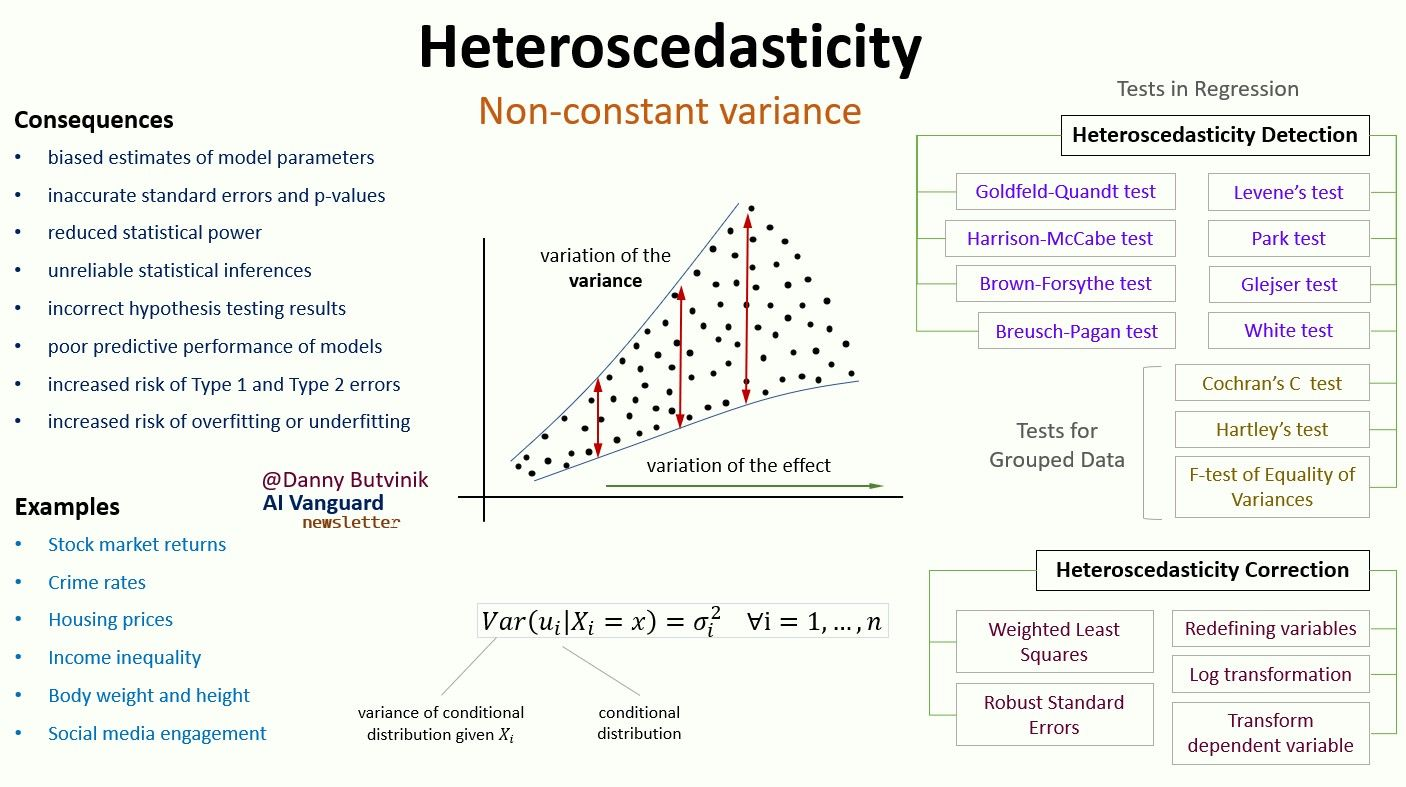

In [63]:
residuals = y_test-y_pred

# Calculate the residuals. We will plot them later on.

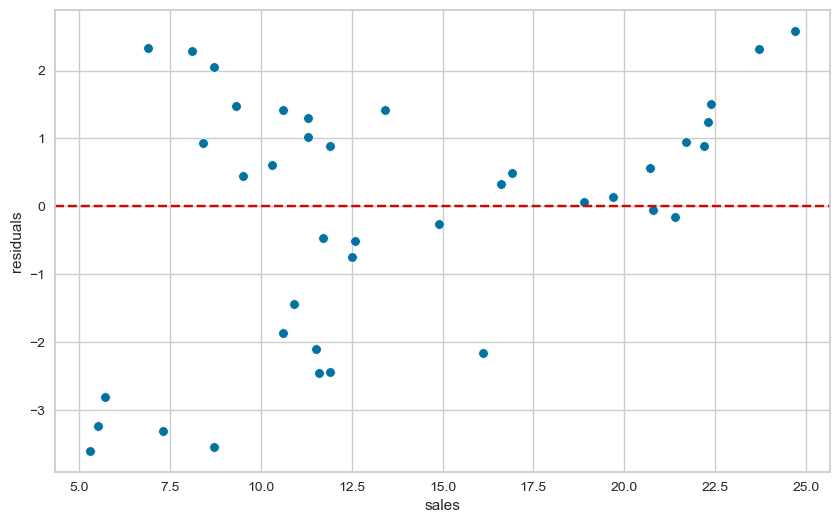

In [64]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

# There are 2 very fundamental and important assumptions we make on our residuals:
# 1- They are normally distributed.
# 2- They are randomly spread around the mean of 0. (This phenomenon is called homoscedasticity)

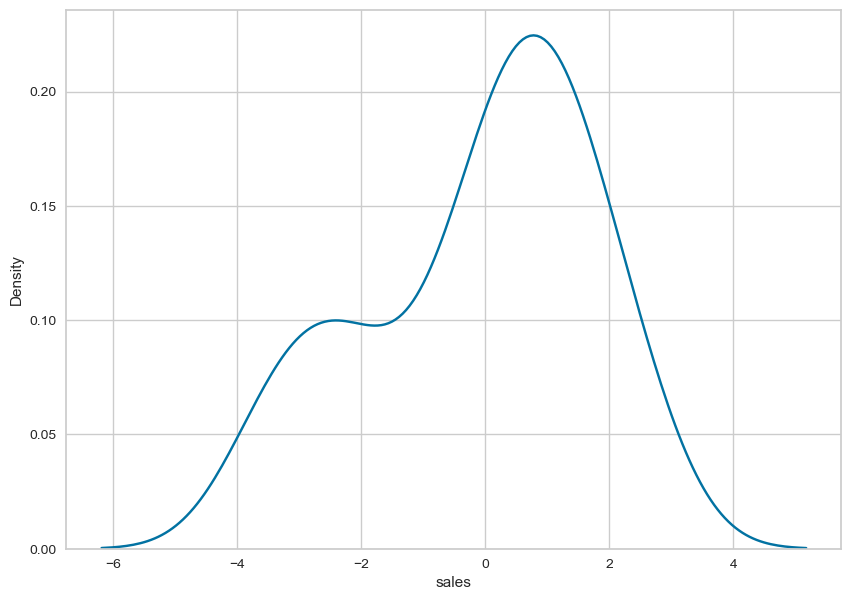

In [65]:
sns.kdeplot(residuals)
plt.show();

# You can check kdeplot or histogram to evaluate the normality of the residuals.

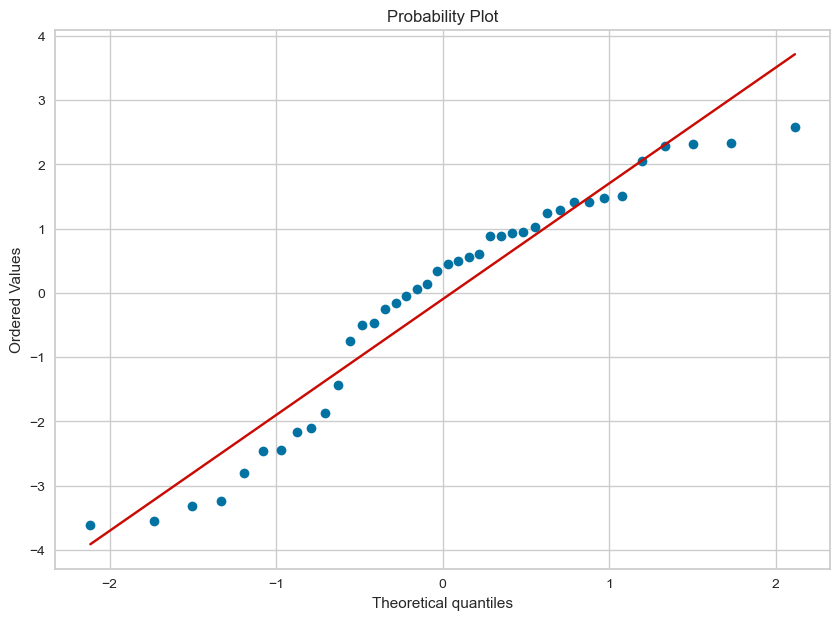

In [66]:
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

# You can also check QQ-normality plot to check if residuals are normally distributed.

In [67]:
from scipy.stats import skew
skew(residuals)

# Check the skewness of the residuals. This is another way of checking your data against normality, with a more formal mathematical calculation.
# If your skewness score is between [-1, 1], you could say that it's more or less normally distributed.
# 0 is the perfect score, means perfectly normally distributed, which you'll probably never get.

-0.5399061927739794

In [68]:
!pip install yellowbrick 
# (for shameless non-anaconda users)
# conda install -c districtdatalabs yellowbrick  (for glorious anaconda users)
# (-c means channel. So we are using the channel "districtdatalabs" to download the package.)

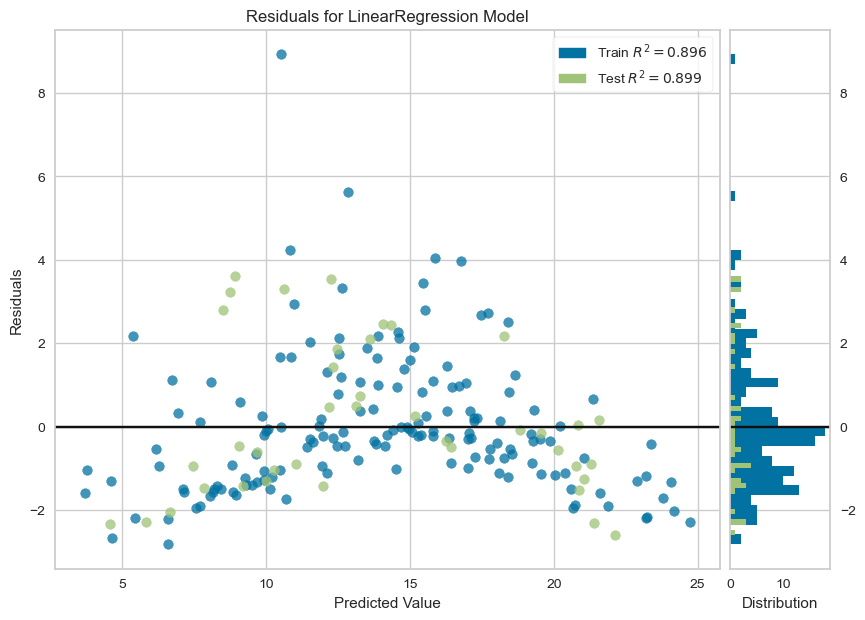

In [69]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

# A much better way of visualising residuals is using `yellowbrick.regressor.ResidualsPlot`
# This saves us manual labour.
# yellowbrick is a great library specifically created to visualise scikit-learn models.

## Prediction Error for LinearRegression

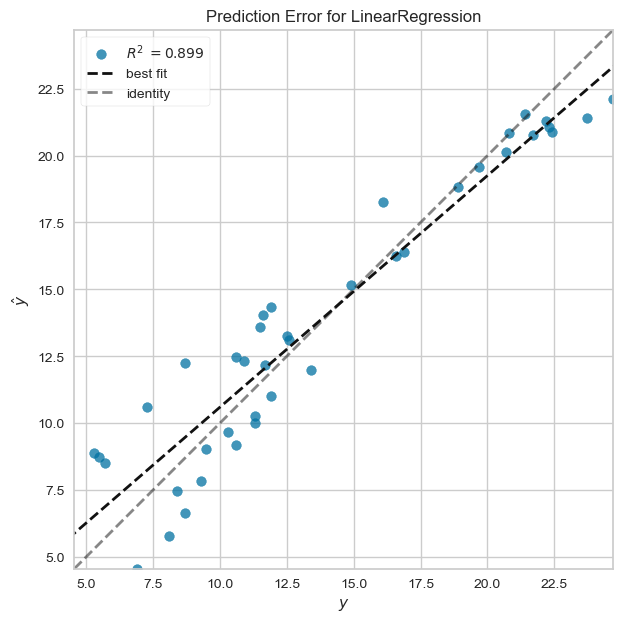

In [70]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();


# On the x-axis, we've got the real target values, whereas on the y-axis, we've got the predicted target values.
# The greyed-out dashed line is the reference line, where predictions would meet our real target values should they be perfect.
# But they're not perfect. Hence, we have the black dashed line, showing how far apart our residuals from the ideal perfect.

## Retraining Model on Full Data

In [71]:
final_model = LinearRegression()

# After we check our model and conclude that this model is good enough, we can train a brand new model, however,
# on the entire dataset this time, as we no longer need to check the model performance once we conclude it's good enough.

In [72]:
final_model.fit(X, y)

# Notice we are training the model on the entire dataset.

LinearRegression()

## Coefficients

In [73]:
final_model.coef_

# Let's check the model coefficients. Keep in mind that these coefficients are created for the independent features.
# They are in the same order as with our columns in X.

array([ 0.04576465,  0.18853002, -0.00103749])

In [74]:
# The bias/intercept of the model
final_model.intercept_

2.9388893694594067

In [75]:
X.head()

# These columns are in the same order as with our coefficients from above.

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Prediction on New Data

In [76]:
adv = [[150, 20, 15]]

# Let's create a new observation point on which we will get a prediction.
# Keep in mind that even if you're getting prediction on a single observation,
# it still has to be represented as 2-D because ML models in scikit-learn accepts only 2-D data.

In [77]:
adv

[[150, 20, 15]]

In [78]:
final_model.predict(adv)

# Getting the prediction

array([13.55862413])

In [79]:
adv_2 = [[160, 20, 15]]

# We increased the first value by 10 (this value represents the TV value in this observation) and kept all else the same.

In [80]:
final_model.predict(adv_2)

# Get the predictions.

array([14.01627059])

In [81]:
14.01627059 - 13.55862413       # 0.04576465 x 10        coef of TV x 10

# The difference between the predicted values is the coefficient of TV multiplied by 10.
# This makes sense, right? Because we only increased the TV value by 10.

0.4576464599999994

## The effect of features on the predicted label

In [82]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [83]:
df.describe()

# To be able to determine which independent feature is more important by looking at their coefficients,
# they all need to be on the same scale. We will talk more about this in the upcoming lectures.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


END OF THE PROJECT